In [1]:
import os
import cv2
import numpy as np
from os import listdir

import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hcluster

%matplotlib inline

In [2]:
def dice_detection(images):
    
    for image in images:

        plt.figure(figsize=(20,18))

        # parametry dla SimpleBlobDetector

        params = cv2.SimpleBlobDetector_Params()  
        params.filterByArea = True
        params.filterByCircularity = True
        params.filterByInertia = True
        params.minThreshold = 20
        params.minArea = 100
        params.minCircularity = 0.3
        params.minInertiaRatio = 0.5

        detector = cv2.SimpleBlobDetector_create(params) # tworzenie detectora
        keypoints = detector.detect(image) #znalezione oczka kostki
        im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            
        plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))
        
        
        #współżędne oczek i określenie max odlelości na jednej sciane na postawie średniej wielkości oczka kostki
        X = np.array([list(i.pt) for i in keypoints])
        S = np.array([i.size for i in keypoints])
        S = np.average(S)
        thresh = 3.4*S
        if len(X) > 0:
            #grupowanie
            clusters = hcluster.fclusterdata(X, thresh, criterion="distance")
            key_map = {i:{np.sum(clusters==i):[X[np.where(np.array(clusters) == i)[0]]]} for i in np.unique(clusters)}
            for i,v in key_map.items():
                for j, k in v.items():
                    plt.text(k[0][0][0]+35, k[0][0][1]+18, s=str(j), fontsize=25, color='red')
            plt.scatter(*np.transpose(X), c=clusters)
        plt.show()

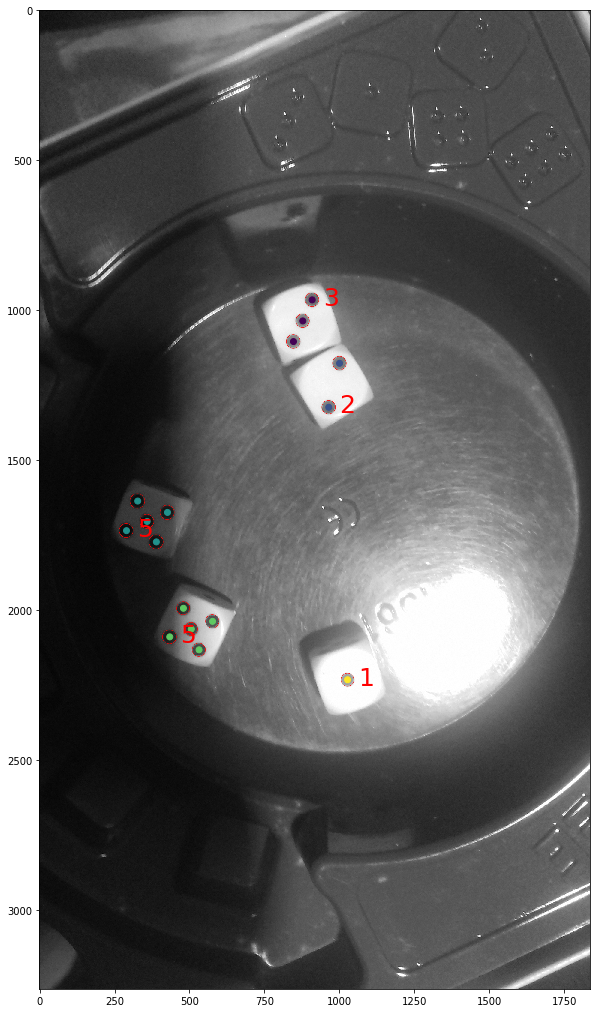

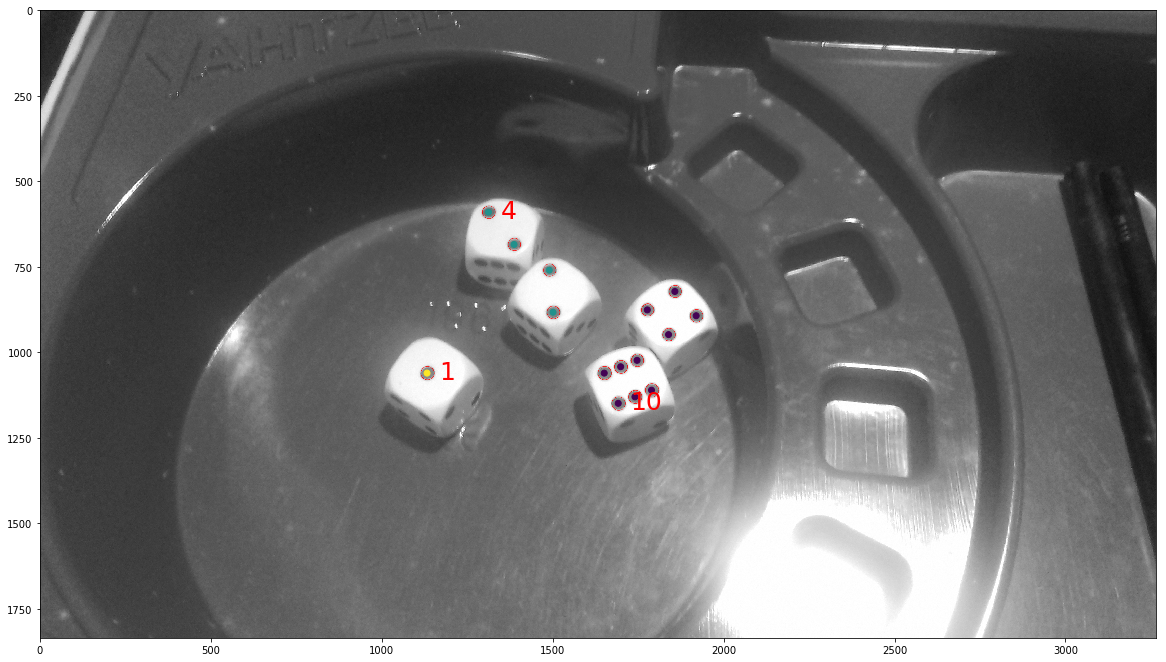

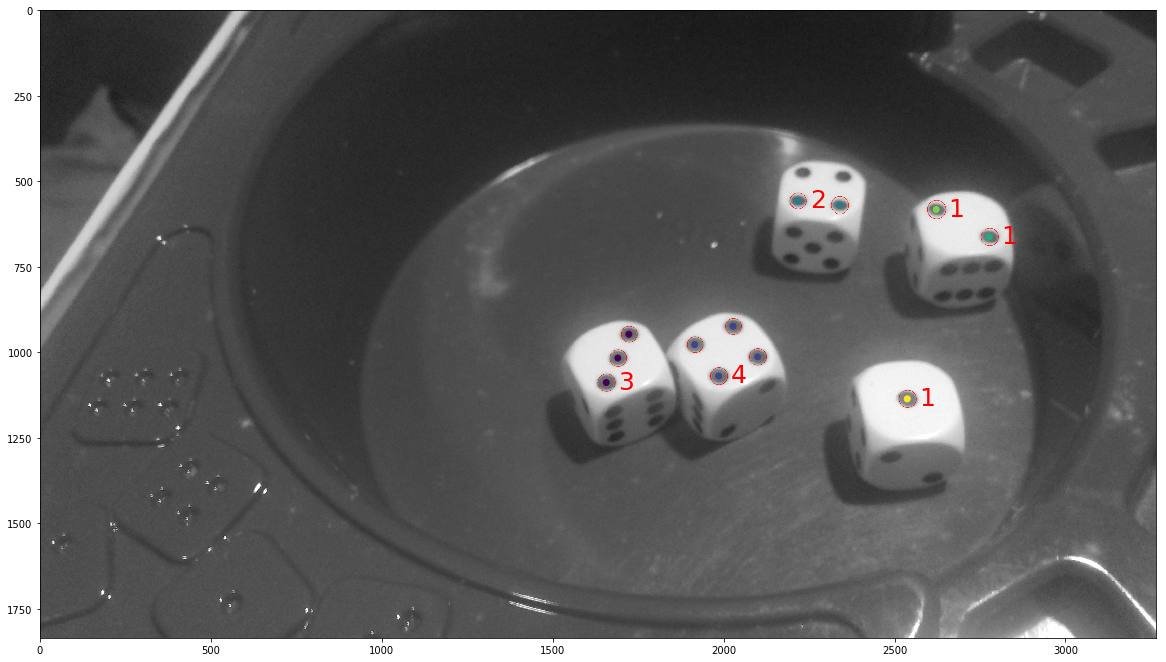

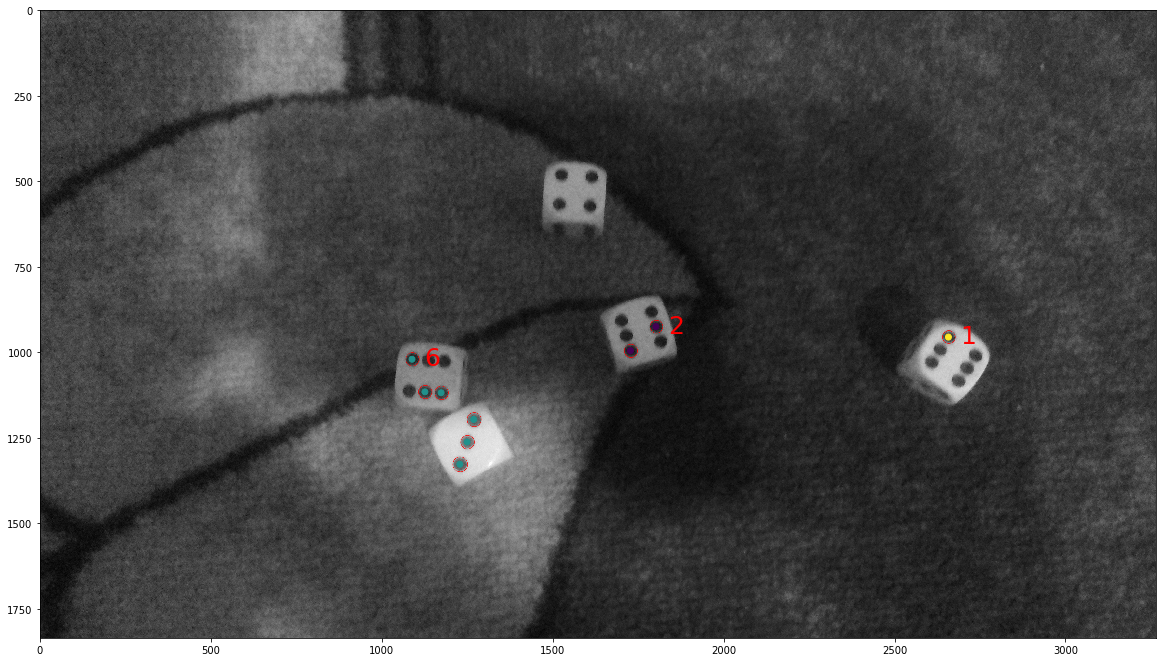

In [3]:
file_list = os.listdir('./kostki/')
file_list = [f for f in file_list if f.endswith(".jpg")]
images = [cv2.imread('./kostki/'+f, cv2.IMREAD_GRAYSCALE) for f in file_list]
dice_detection(images)